#Libraries

In [ ]:
#Data Cleaning
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

#Data Loading

In [ ]:
df = pd.read_csv('/content/Medical_insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


#Data Description

In [ ]:
df.shape

(2772, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


#Data Preprocessing

##Data Cleaning

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##visualisation

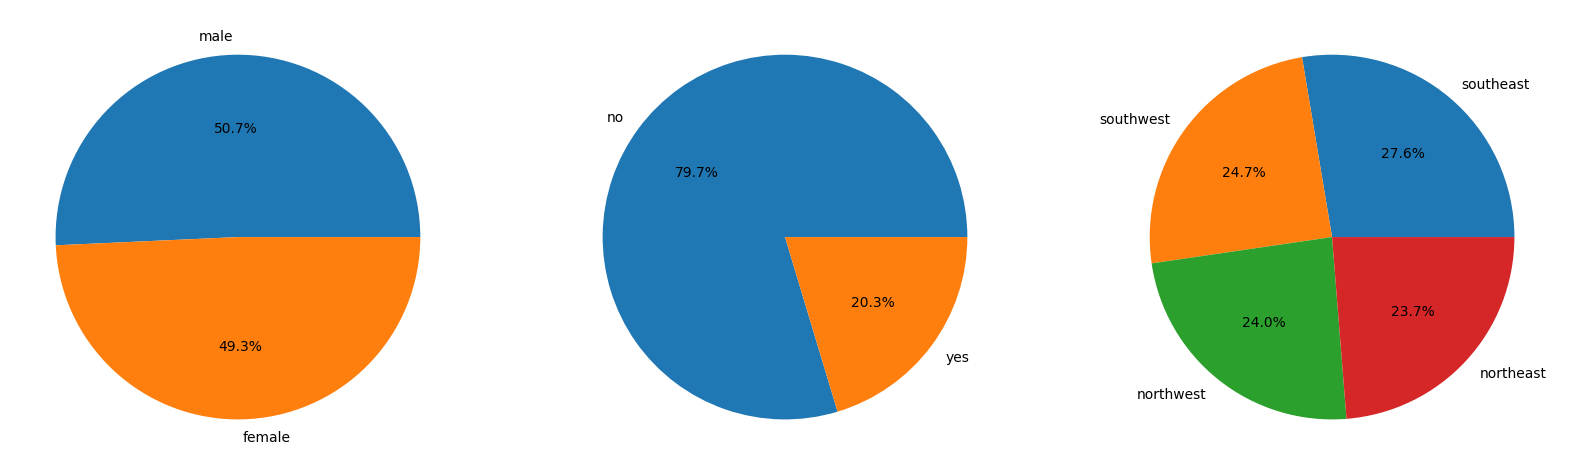

In [ ]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 20))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

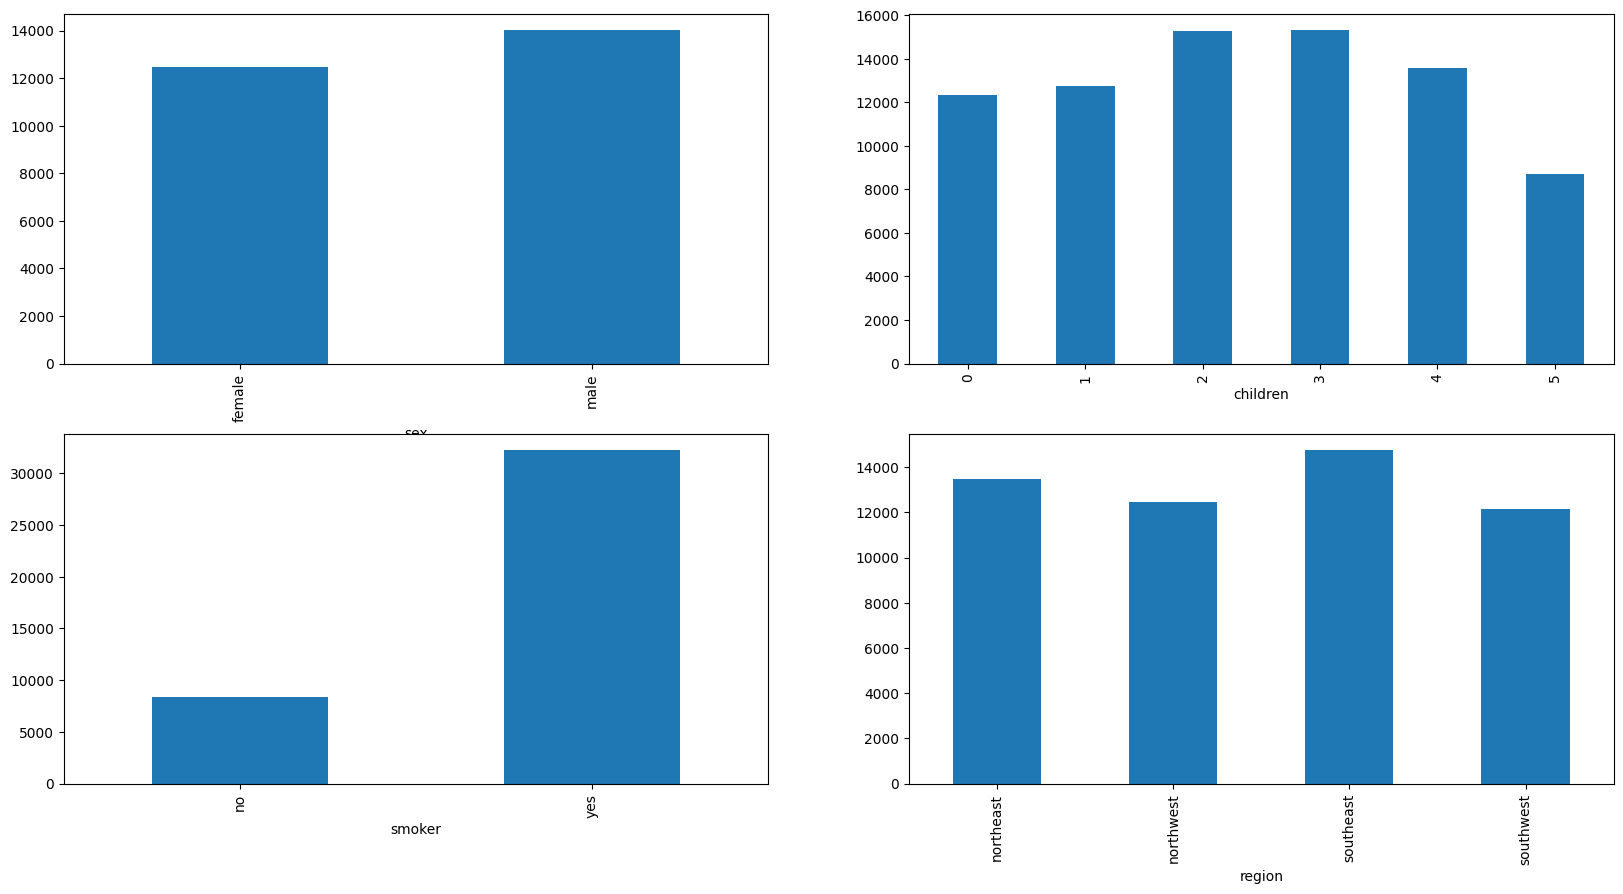

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

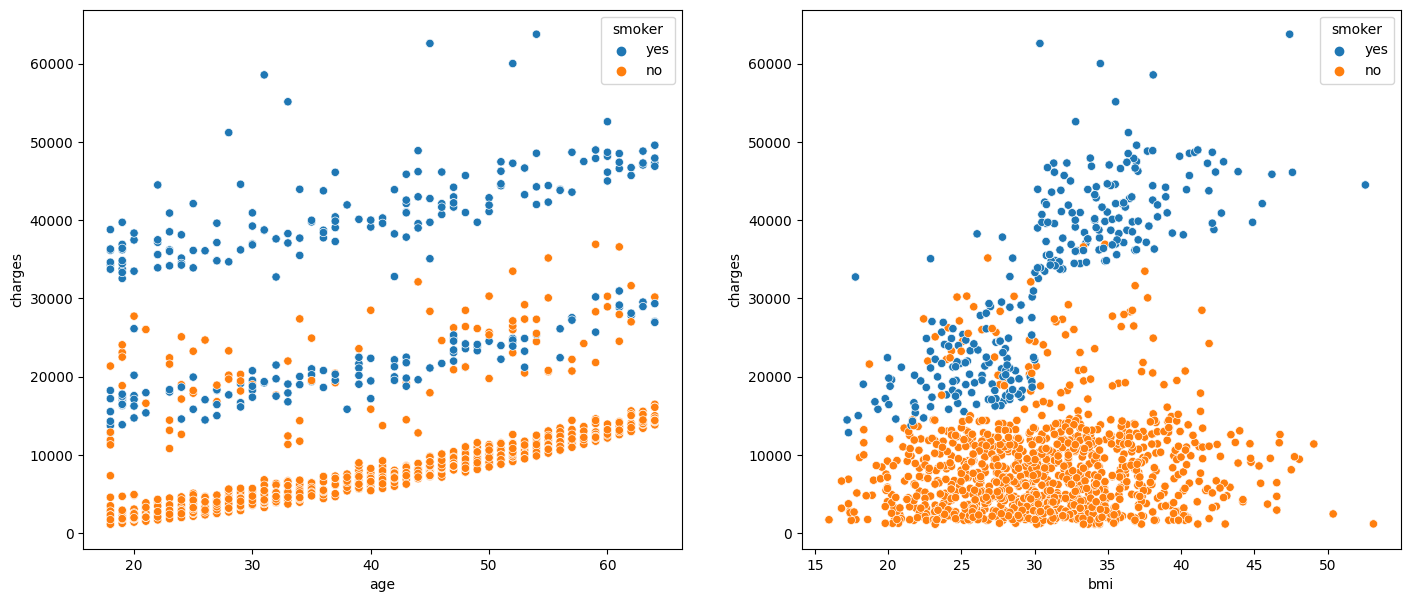

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

<Axes: >

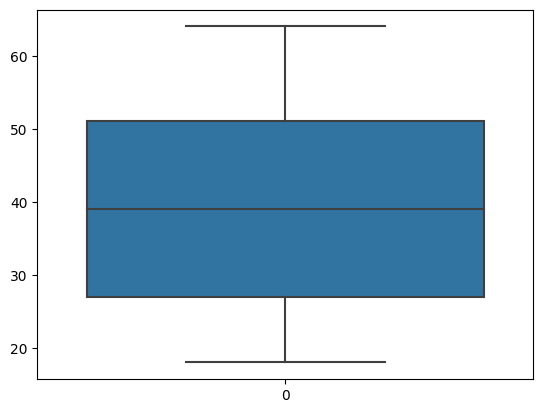

In [ ]:
df.drop_duplicates(inplace=True)
sb.boxplot(df['age'])

<Axes: >

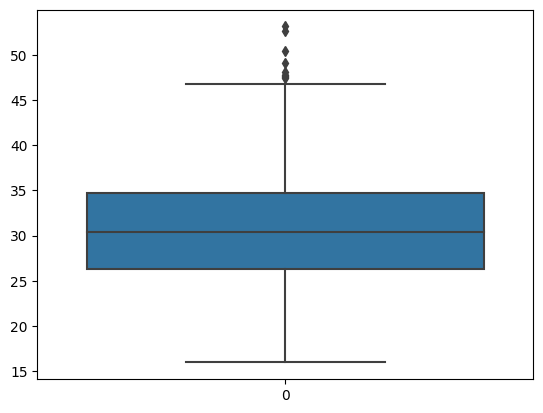

In [ ]:
sb.boxplot(df['bmi'])

13.674999999999994
47.31500000000001
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.7 MB/s eta 0:00:00


<Axes: >

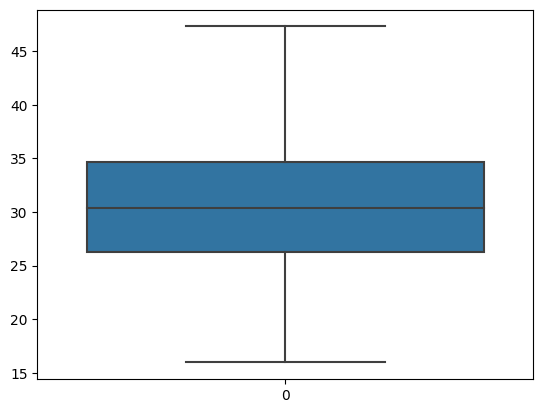

In [ ]:
#outliers handling
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sb.boxplot(df['bmi'])

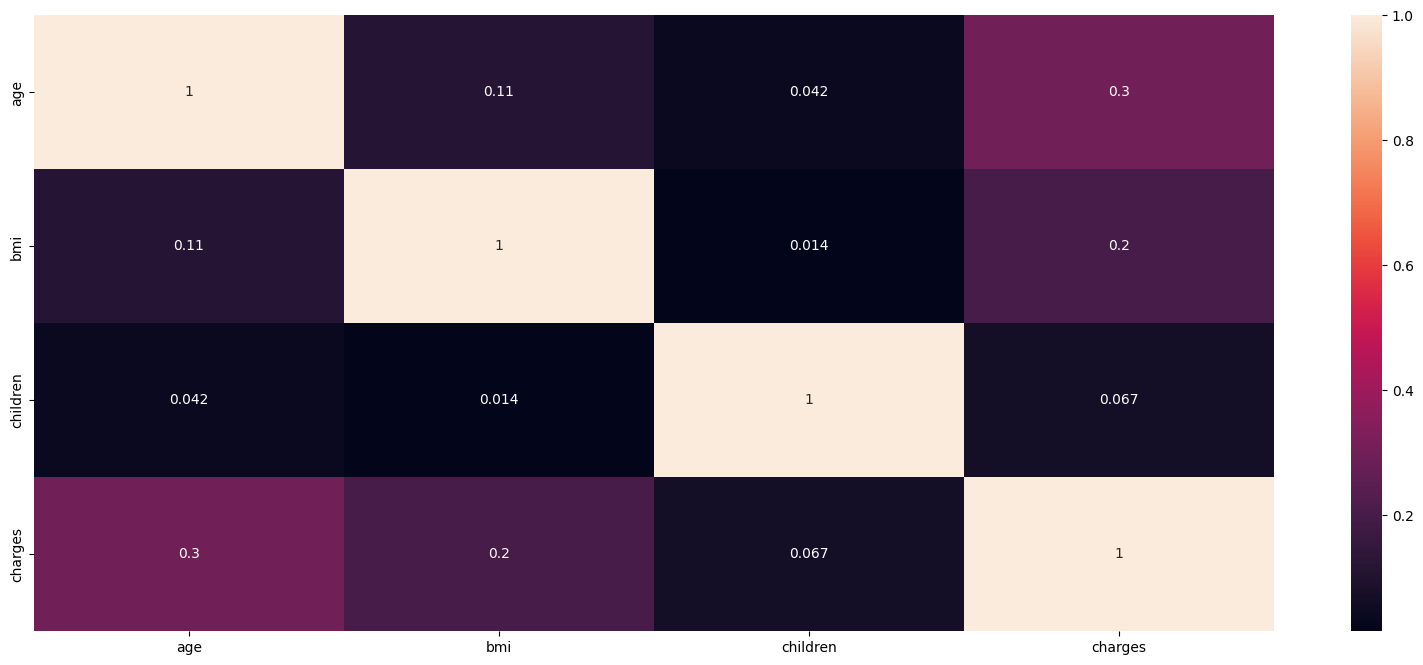

In [ ]:
#correlation Heat Map
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

sb.heatmap(data=corr_mat, ax=ax, annot=True)
plt.show()

##Data Wrangling

In [ ]:
print(df['bmi'].skew())
print(df['age'].skew())

0.23289153320569975
0.054780773126998195


In [ ]:
#encoding of categorical variables
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

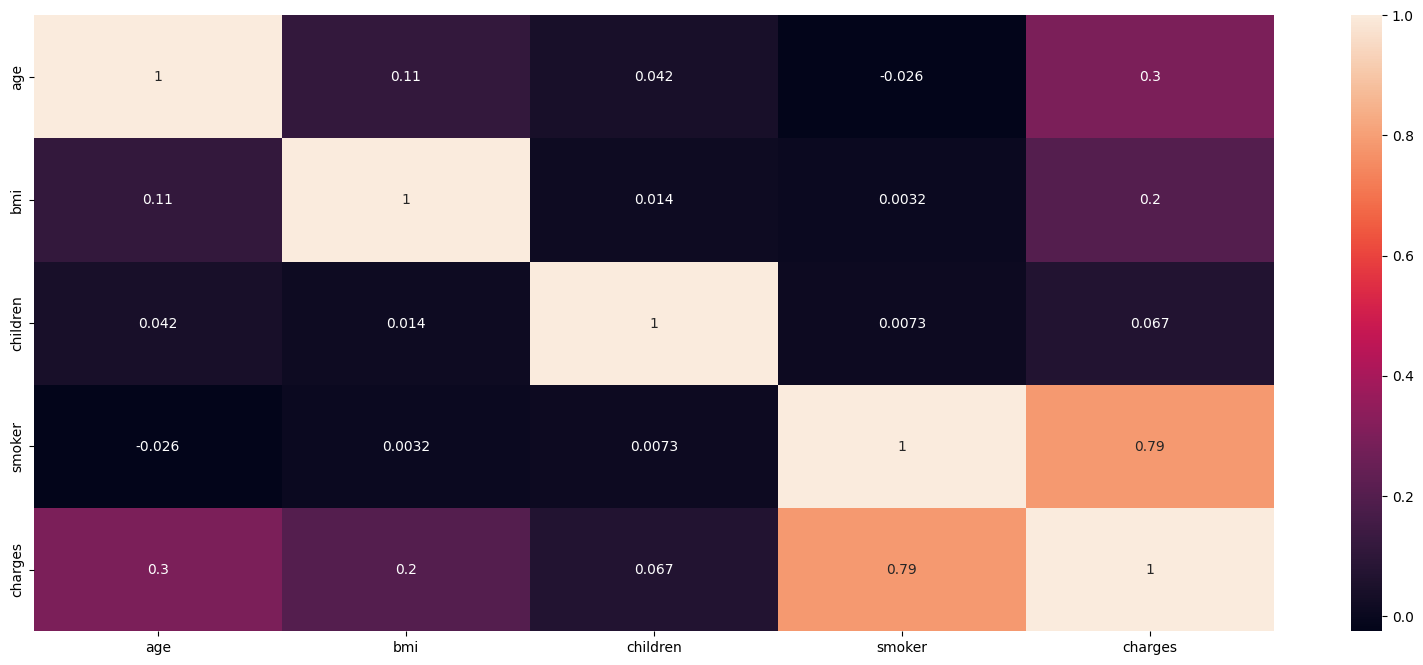

In [ ]:
#correlation Heat Map
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

sb.heatmap(data=corr_mat, ax=ax, annot=True)
plt.show()

In [ ]:
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1337 rows x 7 columns]


#Model Building

In [ ]:
#import all the model libraries
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=df.drop(['charges'],axis=1)
Y=df[['charges']]

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


###linear regression

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import  r2_score

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
pred=lrmodel.predict(xtest)

print("R-2 for Train :",lrmodel.score(xtrain,ytrain))
print("R-2 for Test :",lrmodel.score(xtest,ytest))
print("Cross Validation Score:",cross_val_score(lrmodel,X,Y,cv=5,).mean())

R-2 for Train : 0.7295415541376445
R-2 for Test : 0.806239111557059
Cross Validation Score: 0.7470697972809902


###random forest regression

In [ ]:
#model building
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)

#print score
print("Before Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain2))
print("R-2 for Test :",r2_score(ytest,ypredtest2))
print("Cross validation score :",cross_val_score(rfmodel,X,Y,cv=5,).mean())

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

#model after Hyper parameter tuning
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)

#Score
print("After Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain2))
print("R-2 for Test :",r2_score(ytest,ypredtest2))
print("Cross validation score :",cross_val_score(rfmodel,X,Y,cv=5,).mean())


Before Tuning
R-2 for Train : 0.9738163260247533
R-2 for Test : 0.8819423353068565
Cross validation score : 0.8363637309718952
{'n_estimators': 120}
After Tuning
R-2 for Train : 0.9746383984429655
R-2 for Test : 0.8822009842175969
Cross validation score : 0.8367438097052858


###Gradient Boosting Regressor

In [ ]:
#Model
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)

#Score
print("Before Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain3))
print("R-2 for Test :",r2_score(ytest,ypredtest3))
print("Cross validation score :",cross_val_score(gbmodel,X,Y,cv=5,).mean())

#hyperparameter tuning
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)

print("After Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain3))
print("R-2 for Test :",r2_score(ytest,ypredtest3))
print("Cross validation score :",cross_val_score(gbmodel,X,Y,cv=5,).mean())

Before Tuning
R-2 for Train : 0.8931345821166041
R-2 for Test : 0.9042742523309283
Cross validation score : 0.8551325837862951
{'learning_rate': 0.2, 'n_estimators': 19}
After Tuning
R-2 for Train : 0.8682397447116927
R-2 for Test : 0.9017109716082661
Cross validation score : 0.8606041910125791


###XGBoost Regression

In [ ]:
#model
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)

#score
print("Before Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain4))
print("R-2 for Test :",r2_score(ytest,ypredtest4))
print("Cross validation score :",cross_val_score(xgmodel,X,Y,cv=5,).mean())

#hyperparameter tuning
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

#new model
xgmodel=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)

#score
print("After Tuning")
print("R-2 for Train :",r2_score(ytrain,ypredtrain4))
print("R-2 for Test :",r2_score(ytest,ypredtest4))
print("Cross validation score :",cross_val_score(xgmodel,X,Y,cv=5,).mean())

Before Tuning
R-2 for Train : 0.9954123497078247
R-2 for Test : 0.8548937785039912
Cross validation score : 0.808125309217053
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
After Tuning
R-2 for Train : 0.8693173313051628
R-2 for Test : 0.9022460881213404
Cross validation score : 0.8607115291219747


Identify Important Features

In [ ]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [ ]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


Final Model

In [ ]:
#Drop Unnecessary Columns
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)

#train the final model
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)

finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)

#scores
print("R-2 for Train :",r2_score(ytrain,ypredtrain4))
print("R-2 for Test :",r2_score(ytest,ypredtest4))
print("Cross validation score :",cross_val_score(xgmodel,X,Y,cv=5,).mean())

R-2 for Train : 0.869105118970057
R-2 for Test : 0.9007425513499979
Cross validation score : 0.8606266871712276


###Prediction

In [ ]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([18035.828], dtype=float32)